In [186]:
using CairoMakie, DelimitedFiles
CairoMakie.activate!()

In [187]:
function plotFile(file_name) 
    data = readdlm(file_name)
    fig = Figure()
    ax = Axis(fig[1, 1], title = "Heatmap of $file_name")
    
    # Customize the heatmap with the desired colormap (e.g., :viridis)
    heatmap!(ax, data, colormap = :plasma)
    if minimum(data) !=maximum(data)
    Colorbar(fig[1, 2], limits = (minimum(data), maximum(data)), colormap = :plasma,
    flipaxis = false)
    end

    fig
    
end

plotFile (generic function with 1 method)

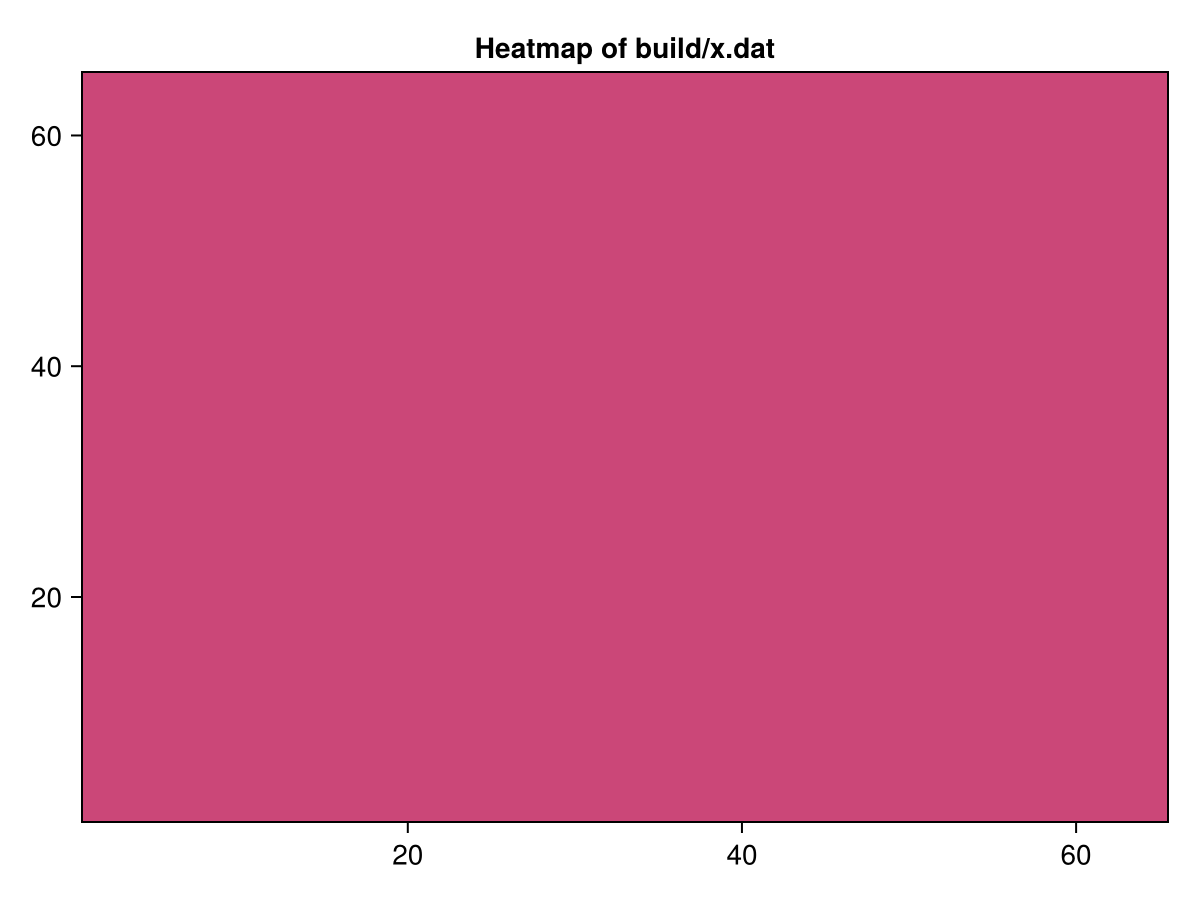

In [188]:
plotFile("build/x.dat")


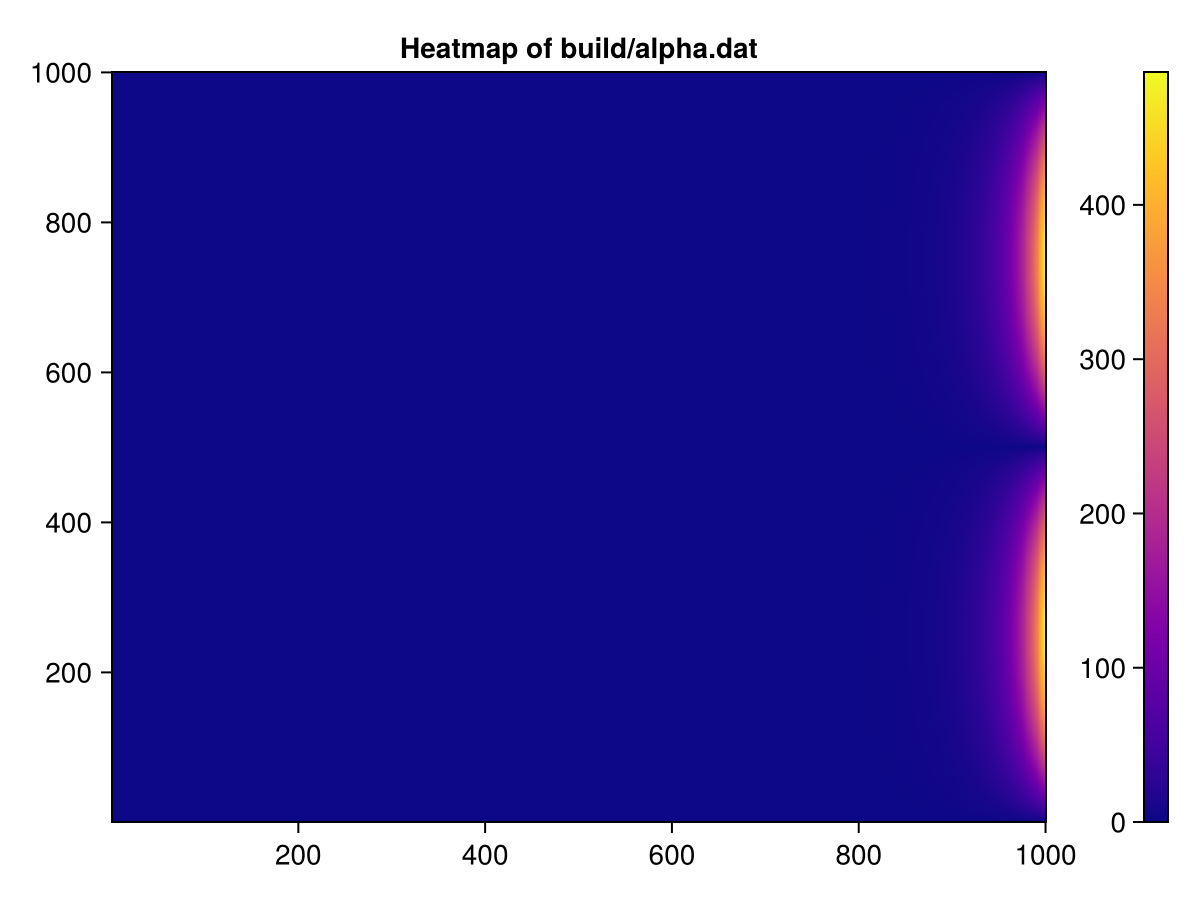

In [189]:
plotFile("build/alpha.dat")

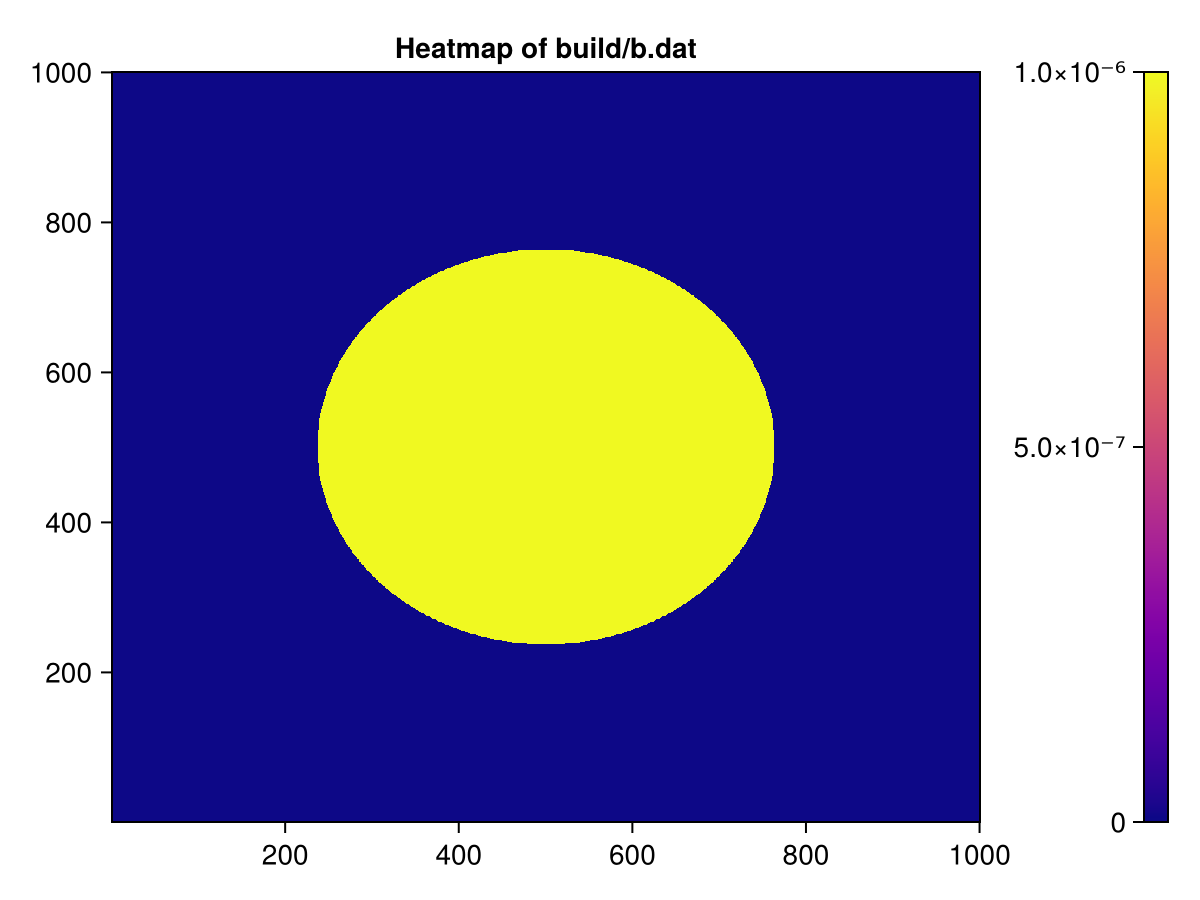

In [190]:
plotFile("build/b.dat")

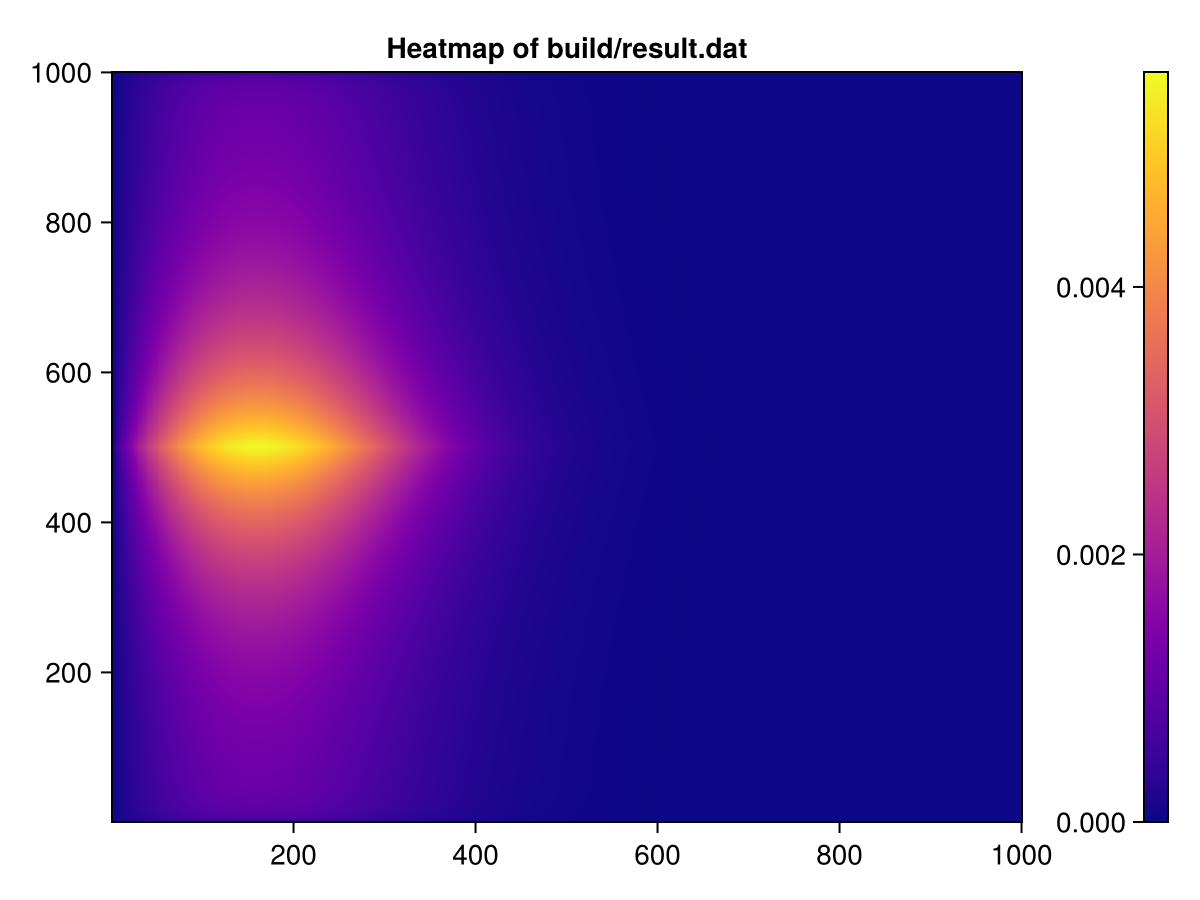

In [191]:
plotFile("build/result.dat")

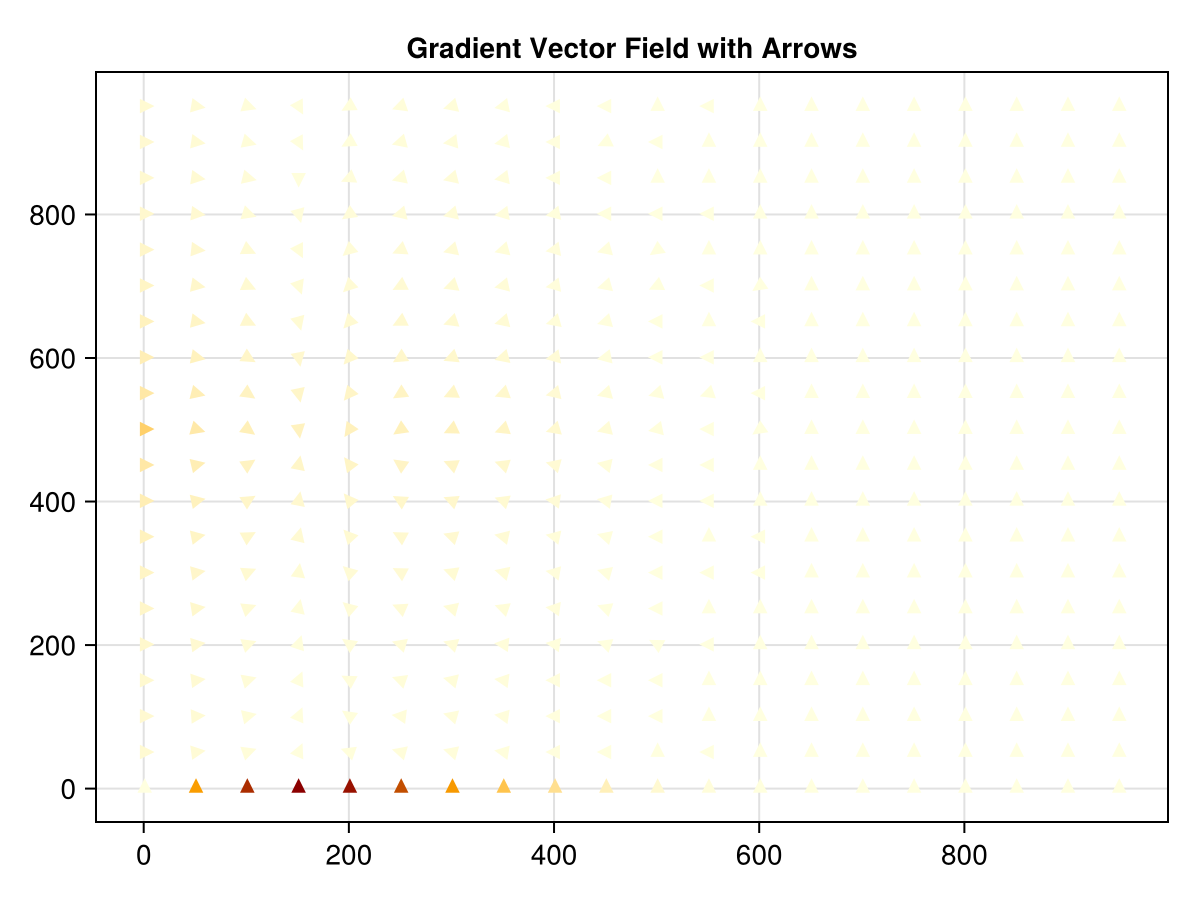

In [199]:
data = readdlm("build/result.dat");

# Create a sample 2D data matrix (for example, a Gaussian distribution)
n = size(data)[1]

grad_x = diff(data, dims=1)
grad_y = diff(data, dims=2)

# Adjust the dimensions of the gradients for alignment with the grid
grad_x = vcat(grad_x, zeros(1, n))  # Add a row of zeros to match original data size
grad_y = hcat(grad_y, zeros(n, 1))  # Add a column of zeros to match original data size
sub = round(Int,n/20);
# Create a figure
fig = Figure()

strength = vec(sqrt.(grad_x[1:sub:end,1:sub:end] .^ 2 .+ grad_y[1:sub:end,1:sub:end] .^ 2))
# Add an axis for the plot
ax = Axis(fig[1, 1], title = "Gradient Vector Field with Arrows")

# Plot the arrows (vector field)
arrows!(ax, Vector(1:sub:n), Vector(1:sub:n), grad_x[1:sub:end,1:sub:end], grad_y[1:sub:end,1:sub:end], arrowsize = 10, lengthscale = n^2/20000,arrowcolor = strength, linecolor = strength,colormap = :heat)

# Display the figure
fig


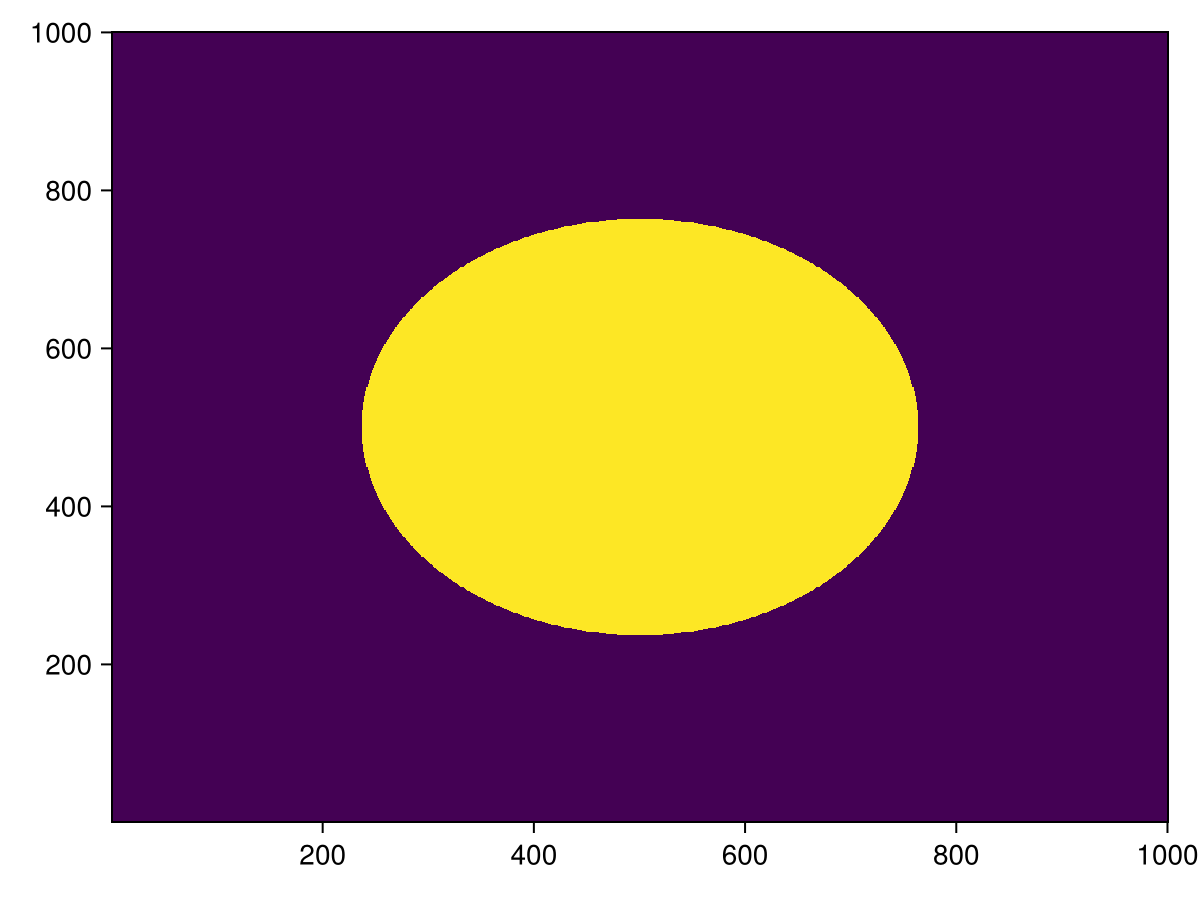

In [193]:
data = readdlm("build/b.dat");
heatmap(data,colorrange = (0,maximum(data)))